# **Import Packages**

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **Load Datasets**

In [2]:
bbri = web.DataReader('BBRI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-23')

display(bbri.head())
display(bbri.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,127.5,122.5,125.0,125.0,278485000.0,1.760418
2003-12-29,125.0,120.0,125.0,125.0,267980000.0,1.760418
2003-12-30,125.0,122.5,125.0,125.0,307350000.0,1.760418
2004-01-02,127.5,122.5,125.0,127.5,228115000.0,1.795627
2004-01-05,127.5,122.5,125.0,127.5,343335000.0,1.795627


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,3290.0,3230.0,3260.0,3280.0,96199300.0,3280.0
2020-10-20,3290.0,3210.0,3280.0,3250.0,134038300.0,3250.0
2020-10-21,3310.0,3230.0,3280.0,3240.0,116981800.0,3240.0
2020-10-22,3300.0,3200.0,3220.0,3300.0,160136600.0,3300.0
2020-10-23,3350.0,3270.0,3350.0,3290.0,117246500.0,3290.0


In [3]:
bbni = web.DataReader('BBNI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-23')

display(bbni.head())
display(bbni.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,1327.199951,1232.400024,1232.400024,1232.400024,426687.0,728.547791
2003-12-29,1303.500000,1232.400024,1232.400024,1303.500000,159810.0,770.579285
2003-12-30,1303.500000,1232.400024,1303.500000,1232.400024,365506.0,728.547791
2004-01-02,1256.099976,1232.400024,1232.400024,1232.400024,71730.0,728.547791
2004-01-05,1256.099976,1232.400024,1232.400024,1232.400024,313290.0,728.547791


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,4900.0,4820.0,4850.0,4890.0,36507600.0,4890.0
2020-10-20,4890.0,4810.0,4870.0,4810.0,28628400.0,4810.0
2020-10-21,4930.0,4850.0,4850.0,4880.0,44696300.0,4880.0
2020-10-22,4880.0,4830.0,4830.0,4860.0,22289100.0,4860.0
2020-10-23,4900.0,4840.0,4860.0,4850.0,23111100.0,4850.0


In [4]:
bmri = web.DataReader('BMRI.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-23')

display(bmri.head())
display(bmri.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,516.234009,491.652008,503.942993,503.942993,131619586.0,180.394806
2003-12-29,503.942993,491.652008,503.942993,503.942993,25004487.0,180.394806
2003-12-30,503.942993,479.359985,503.942993,491.652008,52019544.0,175.995071
2004-01-02,503.942993,479.359985,491.652008,491.652008,60528616.0,175.995071
2004-01-05,528.526001,491.652008,503.942993,516.234009,163827342.0,184.794632


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,5725.0,5575.0,5600.0,5700.0,29468100.0,5700.0
2020-10-20,5750.0,5600.0,5725.0,5650.0,38606600.0,5650.0
2020-10-21,5725.0,5475.0,5675.0,5525.0,56950900.0,5525.0
2020-10-22,5550.0,5400.0,5500.0,5450.0,69350700.0,5450.0
2020-10-23,5575.0,5475.0,5525.0,5550.0,32950100.0,5550.0


In [5]:
bbca = web.DataReader('BBCA.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-23')

display(bbca.head())
display(bbca.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-06-08,900.0,875.0,875.0,887.5,99830000.0,438.253326
2004-06-09,912.5,875.0,887.5,900.0,58858000.0,444.425873
2004-06-10,900.0,887.5,900.0,900.0,33118000.0,444.425873
2004-06-11,900.0,887.5,887.5,900.0,27166000.0,444.425873
2004-06-14,900.0,875.0,900.0,887.5,31708000.0,438.253326


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,29500.0,28550.0,28750.0,29500.0,11374300.0,29500.0
2020-10-20,29400.0,28925.0,29400.0,29025.0,14999100.0,29025.0
2020-10-21,29325.0,28650.0,29300.0,28900.0,15588800.0,28900.0
2020-10-22,29000.0,28525.0,28700.0,29000.0,19374500.0,29000.0
2020-10-23,29200.0,28750.0,29200.0,28850.0,13265600.0,28850.0


In [6]:
bnga = web.DataReader('BNGA.jk',
                    data_source='yahoo',
                    start='2003-12-23',
                    end='2020-10-23')

display(bnga.head())
display(bnga.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-23,409.184998,395.984985,395.984985,395.984985,14894299.0,298.425690
2003-12-29,409.184998,395.984985,395.984985,400.385010,2392702.0,301.741669
2003-12-30,409.184998,395.984985,395.984985,395.984985,9180452.0,298.425690
2004-01-02,404.785004,387.186005,395.984985,387.186005,8231553.0,291.794495
2004-01-05,404.785004,387.186005,387.186005,387.186005,7814492.0,291.794495


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-19,775.0,755.0,765.0,765.0,1353700.0,765.0
2020-10-20,775.0,755.0,770.0,760.0,1827700.0,760.0
2020-10-21,770.0,755.0,755.0,755.0,1728400.0,755.0
2020-10-22,765.0,745.0,755.0,750.0,2198700.0,750.0
2020-10-23,760.0,750.0,750.0,755.0,1147200.0,755.0


In [7]:
print(bbri.shape)
print(bbni.shape)
print(bmri.shape)
print(bbca.shape)
print(bnga.shape)

(4186, 6)
(4158, 6)
(4178, 6)
(4067, 6)
(4135, 6)


# **Data Visualization**

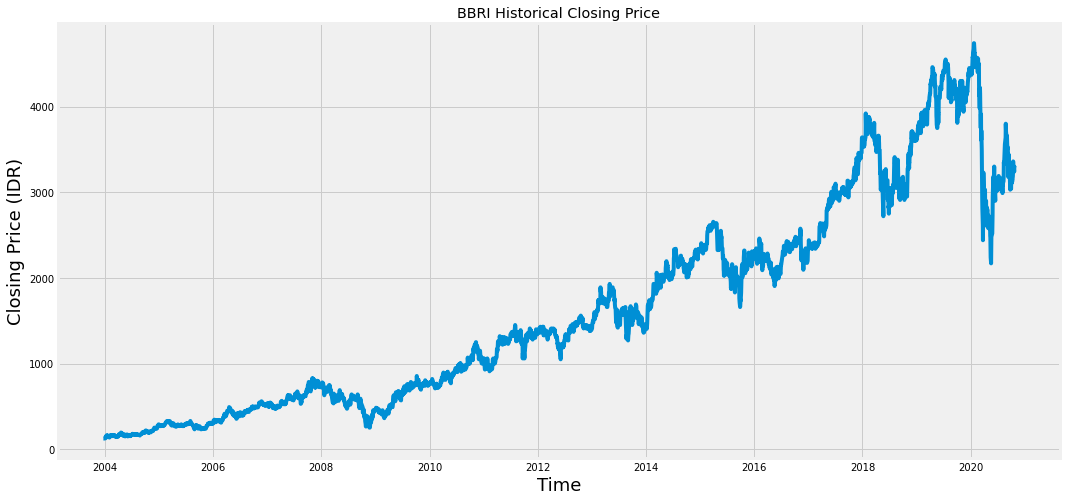

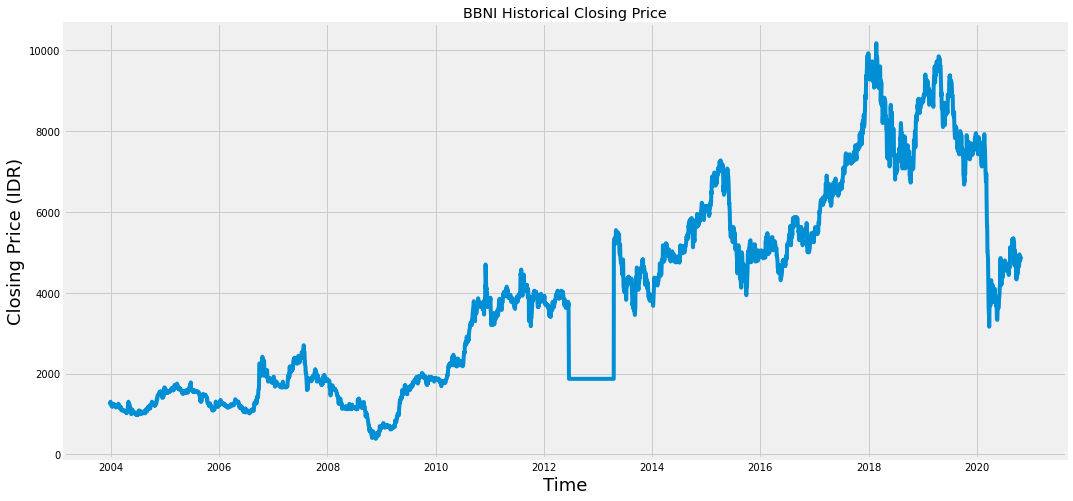

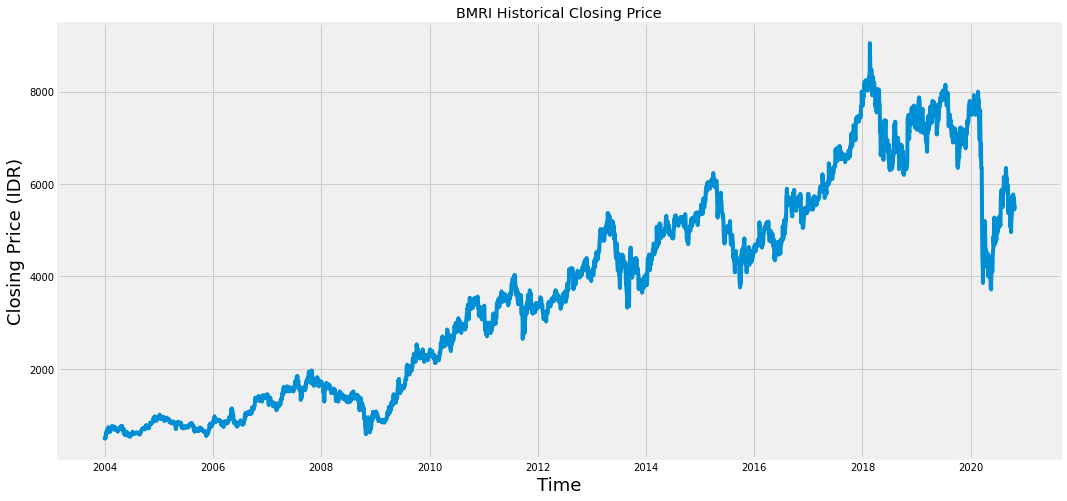

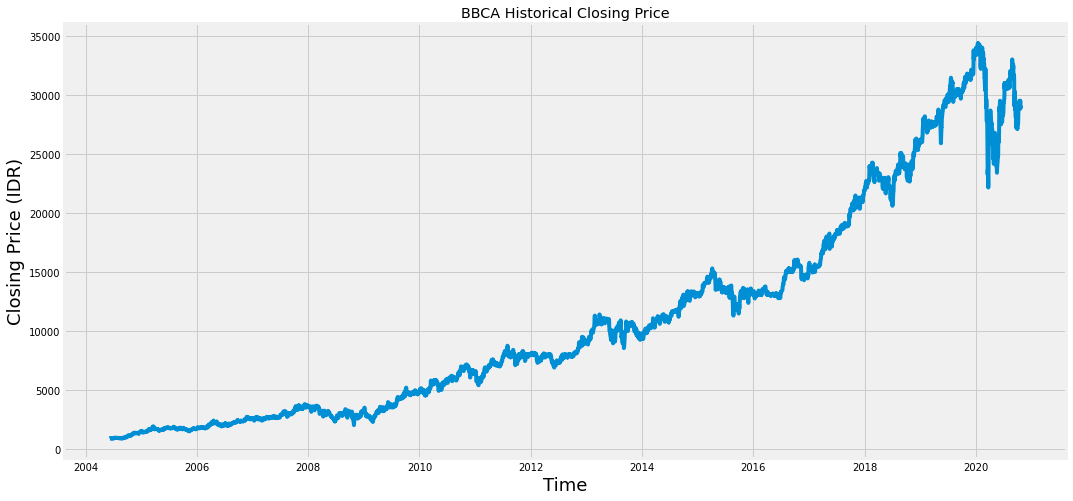

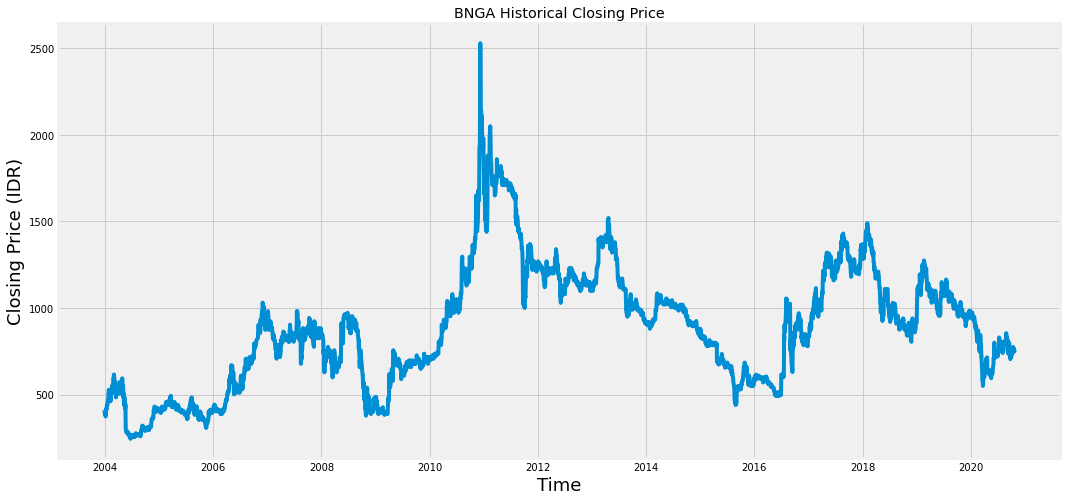

In [8]:
plt.figure(figsize=(16,8))
plt.title('BBRI Historical Closing Price')
plt.plot(bbri['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('BBNI Historical Closing Price')
plt.plot(bbni['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('BMRI Historical Closing Price')
plt.plot(bmri['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('BBCA Historical Closing Price')
plt.plot(bbca['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.show()

plt.figure(figsize=(16,8))
plt.title('BNGA Historical Closing Price')
plt.plot(bnga['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.show()

# **Data Preparation**

## **BBRI**

In [9]:
bbri.shape

(4186, 6)

In [10]:
bbri_close = bbri.filter(['Close'])
train_bbri_close_len = math.ceil(len(bbri_close.values) * .8)
print(train_bbri_close_len)

3349


In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
bbri_close_scaled = scaler.fit_transform(bbri_close.values)
bbri_close_scaled

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.67497291],
       [0.687974  ],
       [0.68580715]])

In [12]:
train_bbri = bbri_close_scaled[0:train_bbri_close_len, :]

x_train_bbri = []
y_train_bbri = []

for i in range(60, len(train_bbri)):
  x_train_bbri.append(train_bbri[i-60:i, 0])
  y_train_bbri.append(train_bbri[i, 0])
  #check for a bunch of x_train_bbri and y _train_bbri
  if i <=60:
    print(x_train_bbri)
    print()
    print(y_train_bbri)
    print()

[array([0.        , 0.        , 0.        , 0.00054171, 0.00054171,
       0.00054171, 0.00108342, 0.00325027, 0.00595883, 0.00541712,
       0.00487541, 0.00650054, 0.00758397, 0.00866739, 0.00704225,
       0.00704225, 0.00650054, 0.00704225, 0.00650054, 0.00595883,
       0.00541712, 0.00325027, 0.00379198, 0.00270856, 0.00433369,
       0.00487541, 0.00704225, 0.00866739, 0.00758397, 0.00758397,
       0.00595883, 0.00812568, 0.00704225, 0.00704225, 0.00758397,
       0.00758397, 0.00866739, 0.00758397, 0.00704225, 0.00595883,
       0.00650054, 0.00758397, 0.00758397, 0.00866739, 0.00866739,
       0.00704225, 0.00704225, 0.00812568, 0.00704225, 0.00650054,
       0.00541712, 0.00487541, 0.00379198, 0.00487541, 0.00541712,
       0.00595883, 0.00595883, 0.00595883, 0.00595883, 0.00487541])]

[0.0037919826652221024]



In [13]:
#changing data to numpy array
x_train_bbri, y_train_bbri = np.array(x_train_bbri), np.array(y_train_bbri)

In [14]:
#changing data dimension to 3 dimension because LSTM needs it
# [number of samples, number of time steps, and number of features]
x_train_bbri = np.reshape(x_train_bbri, (
                                         x_train_bbri.shape[0],
                                         x_train_bbri.shape[1],
                                          1
                                        ))

## **BBNI**



In [15]:
print(bbni.shape)

(4158, 6)


In [16]:
bbni_close = bbni.filter(['Close'])
train_bbni_close_len = math.ceil(len(bbni_close.values) * .8)
print(train_bbni_close_len)

3327


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
bbni_close_scaled = scaler.fit_transform(bbni_close.values)
bbni_close_scaled

array([[0.08577133],
       [0.09304009],
       [0.08577133],
       ...,
       [0.45867636],
       [0.4566317 ],
       [0.45560937]])

In [18]:
train_bbni = bbni_close_scaled[0:train_bbni_close_len, :]

x_train_bbni = []
y_train_bbni = []

for i in range(60, len(train_bbni)):
  x_train_bbni.append(train_bbni[i-60:i, 0])
  y_train_bbni.append(train_bbni[i, 0])
  #check for a bunch of x_train_bbni and y _train_bbni
  if i <=60:
    print(x_train_bbni)
    print()
    print(y_train_bbni)
    print()

[array([0.08577133, 0.09304009, 0.08577133, 0.08577133, 0.08577133,
       0.0833484 , 0.08092548, 0.08092548, 0.08577133, 0.0833484 ,
       0.08092548, 0.08577133, 0.08577133, 0.08819425, 0.0833484 ,
       0.0833484 , 0.0833484 , 0.08577133, 0.0833484 , 0.08577133,
       0.0833484 , 0.0833484 , 0.0833484 , 0.08092548, 0.07850257,
       0.08092548, 0.08092548, 0.0833484 , 0.08092548, 0.0833484 ,
       0.0833484 , 0.0833484 , 0.08092548, 0.0833484 , 0.0833484 ,
       0.08577133, 0.08819425, 0.08577133, 0.0833484 , 0.0833484 ,
       0.08092548, 0.07607964, 0.07850257, 0.07850257, 0.07850257,
       0.08092548, 0.07850257, 0.07850257, 0.07607964, 0.07365672,
       0.07123379, 0.07123379, 0.07123379, 0.07123379, 0.07365672,
       0.07123379, 0.07123379, 0.07123379, 0.07123379, 0.07123379])]

[0.07123379164740243]



In [19]:
#changing data to numpy array
x_train_bbni, y_train_bbni = np.array(x_train_bbni), np.array(y_train_bbni)

In [20]:
#changing data dimension to 3 dimension because LSTM needs it
# [number of samples, number of time steps, and number of features]
x_train_bbni = np.reshape(x_train_bbni, (
                                         x_train_bbni.shape[0],
                                         x_train_bbni.shape[1],
                                          1
                                        ))

## **BMRI**

In [21]:
bmri.shape

(4178, 6)

In [22]:
bmri_close = bmri.filter(['Close'])
train_bmri_close_len = math.ceil(len(bmri_close.values) * .8)
print(train_bmri_close_len)

3343


In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
bmri_close_scaled = scaler.fit_transform(bmri_close.values)
bmri_close_scaled

array([[0.00143614],
       [0.00143614],
       [0.        ],
       ...,
       [0.58812145],
       [0.57935807],
       [0.59104257]])

In [24]:
train_bmri = bmri_close_scaled[0:train_bmri_close_len, :]

x_train_bmri = []
y_train_bmri = []

for i in range(60, len(train_bmri)):
  x_train_bmri.append(train_bmri[i-60:i, 0])
  y_train_bmri.append(train_bmri[i, 0])
  #check for a bunch of x_train_bmri and y _train_bmri
  if i <=60:
    print(x_train_bmri)
    print()
    print(y_train_bmri)
    print()

[array([0.00143614, 0.00143614, 0.        , 0.        , 0.00287228,
       0.00143614, 0.00143614, 0.00718082, 0.01436177, 0.01292551,
       0.01148937, 0.01436177, 0.02010645, 0.02010645, 0.01867031,
       0.02010645, 0.01867031, 0.02441499, 0.02872354, 0.01867031,
       0.01867031, 0.01867031, 0.01723405, 0.01723405, 0.01867031,
       0.01723405, 0.02441499, 0.02297873, 0.02297873, 0.02297873,
       0.02297873, 0.02297873, 0.02297873, 0.02441499, 0.02585114,
       0.03159582, 0.03159582, 0.02872354, 0.02872354, 0.02872354,
       0.02297873, 0.02297873, 0.02872354, 0.03015967, 0.03015967,
       0.02872354, 0.02728727, 0.02728727, 0.02872354, 0.02297873,
       0.02154259, 0.02154259, 0.02297873, 0.02297873, 0.02297873,
       0.02154259, 0.02154259, 0.02010645, 0.01867031, 0.01723405])]

[0.020106447245905386]



In [25]:
#changing data to numpy array
x_train_bmri, y_train_bmri = np.array(x_train_bmri), np.array(y_train_bmri)

In [26]:
#changing data dimension to 3 dimension because LSTM needs it
# [number of samples, number of time steps, and number of features]
x_train_bmri = np.reshape(x_train_bmri, (
                                         x_train_bmri.shape[0],
                                         x_train_bmri.shape[1],
                                          1
                                        ))

## **BBCA**

In [27]:
bbca.shape

(4067, 6)

In [28]:
bbca_close = bbca.filter(['Close'])
train_bbca_close_len = math.ceil(len(bbca_close.values) * .8)
print(train_bbca_close_len)

3254


In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
bbca_close_scaled = scaler.fit_transform(bbca_close.values)
bbca_close_scaled

array([[0.00000000e+00],
       [3.73273610e-04],
       [3.73273610e-04],
       ...,
       [8.36506159e-01],
       [8.39492348e-01],
       [8.35013065e-01]])

In [30]:
train_bbca = bbca_close_scaled[0:train_bbca_close_len, :]

x_train_bbca = []
y_train_bbca = []

for i in range(60, len(train_bbca)):
  x_train_bbca.append(train_bbca[i-60:i, 0])
  y_train_bbca.append(train_bbca[i, 0])
  #check for a bunch of x_train_bbca and y _train_bbca
  if i <=60:
    print(x_train_bbca)
    print()
    print(y_train_bbca)
    print()

[array([0.        , 0.00037327, 0.00037327, 0.00037327, 0.        ,
       0.00074655, 0.00037327, 0.        , 0.        , 0.        ,
       0.        , 0.00037327, 0.00037327, 0.00074655, 0.00074655,
       0.00111982, 0.00149309, 0.        , 0.00037327, 0.00037327,
       0.00149309, 0.00149309, 0.00149309, 0.00186637, 0.00186637,
       0.00223964, 0.00149309, 0.00149309, 0.00186637, 0.00186637,
       0.00186637, 0.00186637, 0.00186637, 0.00186637, 0.00149309,
       0.00149309, 0.00149309, 0.00149309, 0.00149309, 0.00111982,
       0.00149309, 0.00186637, 0.00186637, 0.00149309, 0.00074655,
       0.00074655, 0.00111982, 0.00074655, 0.00074655, 0.00037327,
       0.00037327, 0.00111982, 0.00111982, 0.00074655, 0.00074655,
       0.00074655, 0.00037327, 0.00037327, 0.00074655, 0.        ])]

[0.000373273609555802]



In [31]:
#changing data to numpy array
x_train_bbca, y_train_bbca = np.array(x_train_bbca), np.array(y_train_bbca)

In [32]:
#changing data dimension to 3 dimension because LSTM needs it
# [number of samples, number of time steps, and number of features]
x_train_bbca = np.reshape(x_train_bbca, (
                                         x_train_bbca.shape[0],
                                         x_train_bbca.shape[1],
                                          1
                                        ))

## **BNGA**

In [33]:
bnga.shape

(4135, 6)

In [34]:
bnga_close = bnga.filter(['Close'])
train_bnga_close_len = math.ceil(len(bnga_close.values) * .8)
print(train_bnga_close_len)

3308


In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
bnga_close_scaled = scaler.fit_transform(bnga_close.values)
bnga_close_scaled

array([[0.06552492],
       [0.06745221],
       [0.06552492],
       ...,
       [0.22278012],
       [0.22059003],
       [0.22278012]])

In [36]:
train_bnga = bnga_close_scaled[0:train_bnga_close_len, :]

x_train_bnga = []
y_train_bnga = []

for i in range(60, len(train_bnga)):
  x_train_bnga.append(train_bnga[i-60:i, 0])
  y_train_bnga.append(train_bnga[i, 0])
  #check for a bunch of x_train_bnga and y _train_bnga
  if i <=60:
    print(x_train_bnga)
    print()
    print(y_train_bnga)
    print()

[array([0.06552492, 0.06745221, 0.06552492, 0.06167081, 0.06167081,
       0.05588896, 0.05781624, 0.06359808, 0.07516133, 0.07516133,
       0.07323405, 0.07708818, 0.08479731, 0.08479731, 0.08479731,
       0.09443327, 0.09443327, 0.09443327, 0.1137052 , 0.1137052 ,
       0.12334162, 0.1137052 , 0.10406923, 0.10406923, 0.10406923,
       0.10406923, 0.10406923, 0.09443327, 0.10406923, 0.1137052 ,
       0.1137052 , 0.1137052 , 0.12334162, 0.12334162, 0.13297757,
       0.12334162, 0.13297757, 0.12334162, 0.13297757, 0.14261355,
       0.15224953, 0.15224953, 0.16188548, 0.16188548, 0.15224953,
       0.15224953, 0.14261355, 0.14261355, 0.13297757, 0.1137052 ,
       0.1137052 , 0.1137052 , 0.10406923, 0.1137052 , 0.1137052 ,
       0.1137052 , 0.1137052 , 0.12334162, 0.1137052 , 0.1137052 ])]

[0.12334161820638732]



In [37]:
#changing data to numpy array
x_train_bnga, y_train_bnga = np.array(x_train_bnga), np.array(y_train_bnga)

In [38]:
#changing data dimension to 3 dimension because LSTM needs it
# [number of samples, number of time steps, and number of features]
x_train_bnga = np.reshape(x_train_bnga, (
                                         x_train_bnga.shape[0],
                                         x_train_bnga.shape[1],
                                          1
                                        ))

# **Data Modelling**

## **BBRI**

In [39]:
#Build Architecture for Neural Network
model_bbri = Sequential()
model_bbri.add(LSTM(50, return_sequences=True,
               input_shape=(x_train_bbri.shape[1], 1)))
model_bbri.add(LSTM(50, return_sequences=False))
model_bbri.add(Dense(25))
model_bbri.add(Dense(1))

In [40]:
#Compile the architecture
model_bbri.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model_bbri.fit(x_train_bbri, y_train_bbri, batch_size=1, epochs=100)

Epoch 1/100
3289/3289 [==============================] - 19s 6ms/step - loss: 5.2590e-04
Epoch 2/100
3289/3289 [==============================] - 19s 6ms/step - loss: 1.9095e-04
Epoch 3/100
3289/3289 [==============================] - 19s 6ms/step - loss: 1.3722e-04
Epoch 4/100
3289/3289 [==============================] - 19s 6ms/step - loss: 1.3273e-04
Epoch 5/100
3289/3289 [==============================] - 19s 6ms/step - loss: 1.1813e-04
Epoch 6/100
3289/3289 [==============================] - 19s 6ms/step - loss: 1.0025e-04
Epoch 7/100
3289/3289 [==============================] - 19s 6ms/step - loss: 9.1032e-05
Epoch 8/100
3289/3289 [==============================] - 19s 6ms/step - loss: 8.5852e-05
Epoch 9/100
3289/3289 [==============================] - 19s 6ms/step - loss: 8.8897e-05
Epoch 10/100
3289/3289 [==============================] - 19s 6ms/step - loss: 7.8604e-05
Epoch 11/100
3289/3289 [==============================] - 19s 6ms/step - loss: 8.0974e-05
Epoch 12/100
3289/3

## **BBNI**

In [42]:
#Build Architecture for Neural Network
model_bbni = Sequential()
model_bbni.add(LSTM(50, return_sequences=True,
               input_shape=(x_train_bbni.shape[1], 1)))
model_bbni.add(LSTM(50, return_sequences=False))
model_bbni.add(Dense(25))
model_bbni.add(Dense(1))

In [43]:
#Compile the architecture
model_bbni.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
model_bbni.fit(x_train_bbni, y_train_bbni, batch_size=1, epochs=100)

Epoch 1/100
3267/3267 [==============================] - 19s 6ms/step - loss: 6.9877e-04
Epoch 2/100
3267/3267 [==============================] - 19s 6ms/step - loss: 3.6630e-04
Epoch 3/100
3267/3267 [==============================] - 19s 6ms/step - loss: 2.4249e-04
Epoch 4/100
3267/3267 [==============================] - 19s 6ms/step - loss: 2.3905e-04
Epoch 5/100
3267/3267 [==============================] - 19s 6ms/step - loss: 2.0664e-04
Epoch 6/100
3267/3267 [==============================] - 20s 6ms/step - loss: 2.1645e-04
Epoch 7/100
3267/3267 [==============================] - 20s 6ms/step - loss: 1.9082e-04
Epoch 8/100
3267/3267 [==============================] - 19s 6ms/step - loss: 1.8506e-04
Epoch 9/100
3267/3267 [==============================] - 19s 6ms/step - loss: 1.8324e-04
Epoch 10/100
3267/3267 [==============================] - 19s 6ms/step - loss: 1.7608e-04
Epoch 11/100
3267/3267 [==============================] - 20s 6ms/step - loss: 1.7977e-04
Epoch 12/100
3267/3

## **BMRI**

In [45]:
#Build Architecture for Neural Network
model_bmri = Sequential()
model_bmri.add(LSTM(50, return_sequences=True,
               input_shape=(x_train_bmri.shape[1], 1)))
model_bmri.add(LSTM(50, return_sequences=False))
model_bmri.add(Dense(25))
model_bmri.add(Dense(1))

In [46]:
#Compile the architecture
model_bmri.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model_bmri.fit(x_train_bmri, y_train_bmri, batch_size=1, epochs=100)

Epoch 1/100
3283/3283 [==============================] - 19s 6ms/step - loss: 6.6119e-04
Epoch 2/100
3283/3283 [==============================] - 19s 6ms/step - loss: 2.9250e-04
Epoch 3/100
3283/3283 [==============================] - 19s 6ms/step - loss: 2.0866e-04
Epoch 4/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.9870e-04
Epoch 5/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.6586e-04
Epoch 6/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.5805e-04
Epoch 7/100
3283/3283 [==============================] - 20s 6ms/step - loss: 1.5068e-04
Epoch 8/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.3710e-04
Epoch 9/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.3103e-04
Epoch 10/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.3339e-04
Epoch 11/100
3283/3283 [==============================] - 19s 6ms/step - loss: 1.3515e-04
Epoch 12/100
3283/3

## **BBCA**

In [48]:
#Build Architecture for Neural Network
model_bbca = Sequential()
model_bbca.add(LSTM(50, return_sequences=True,
               input_shape=(x_train_bbca.shape[1], 1)))
model_bbca.add(LSTM(50, return_sequences=False))
model_bbca.add(Dense(25))
model_bbca.add(Dense(1))

In [49]:
#Compile the architecture
model_bbca.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model_bbca.fit(x_train_bbca, y_train_bbca, batch_size=1, epochs=100)

Epoch 1/100
3194/3194 [==============================] - 18s 6ms/step - loss: 3.3403e-04
Epoch 2/100
3194/3194 [==============================] - 18s 6ms/step - loss: 1.3913e-04
Epoch 3/100
3194/3194 [==============================] - 18s 6ms/step - loss: 8.9368e-05
Epoch 4/100
3194/3194 [==============================] - 19s 6ms/step - loss: 8.1921e-05
Epoch 5/100
3194/3194 [==============================] - 19s 6ms/step - loss: 6.0926e-05
Epoch 6/100
3194/3194 [==============================] - 19s 6ms/step - loss: 6.4187e-05
Epoch 7/100
3194/3194 [==============================] - 19s 6ms/step - loss: 5.9589e-05
Epoch 8/100
3194/3194 [==============================] - 19s 6ms/step - loss: 5.5472e-05
Epoch 9/100
3194/3194 [==============================] - 19s 6ms/step - loss: 4.9381e-05
Epoch 10/100
3194/3194 [==============================] - 18s 6ms/step - loss: 4.4956e-05
Epoch 11/100
3194/3194 [==============================] - 19s 6ms/step - loss: 4.8912e-05
Epoch 12/100
3194/3

## **BNGA**

In [51]:
#Build Architecture for Neural Network
model_bnga = Sequential()
model_bnga.add(LSTM(50, return_sequences=True,
               input_shape=(x_train_bnga.shape[1], 1)))
model_bnga.add(LSTM(50, return_sequences=False))
model_bnga.add(Dense(25))
model_bnga.add(Dense(1))

In [52]:
#Compile the architecture
model_bnga.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model_bnga.fit(x_train_bnga, y_train_bnga, batch_size=1, epochs=100)

Epoch 1/100
3248/3248 [==============================] - 19s 6ms/step - loss: 0.0011
Epoch 2/100
3248/3248 [==============================] - 19s 6ms/step - loss: 4.0982e-04
Epoch 3/100
3248/3248 [==============================] - 19s 6ms/step - loss: 3.8604e-04
Epoch 4/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.6918e-04
Epoch 5/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.6142e-04
Epoch 6/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.3889e-04
Epoch 7/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.3135e-04
Epoch 8/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.3743e-04
Epoch 9/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.1954e-04
Epoch 10/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.3486e-04
Epoch 11/100
3248/3248 [==============================] - 19s 6ms/step - loss: 2.1209e-04
Epoch 12/100
3248/3248 

# **Data Evaluation**

## **BBRI**

In [54]:
test_bbri = bbri_close_scaled[train_bbri_close_len-60:, :]

In [55]:
x_test_bbri = []
y_test_bbri = bbri_close.values[train_bbri_close_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_bbri)):
  x_test_bbri.append(test_bbri[i-60:i, 0])

In [56]:
#ubah x_test menjadi numpy array
x_test_bbri = np.array(x_test_bbri)

In [57]:
#mengubah x test menjadi 3 dimensi
x_test_bbri = np.reshape(x_test_bbri,
                    (x_test_bbri.shape[0],
                     x_test_bbri.shape[1],
                     1))

In [58]:
prediction_bbri = model_bbri.predict(x_test_bbri)

# mengembalikan lagi ke angka awal (tidak di scaling)
prediction_bbri = scaler.inverse_transform(prediction_bbri)

In [66]:
rmse_bbri = np.sqrt(np.mean(prediction_bbri - y_test_bbri)**2)
print(rmse_bbri)

1657.835371630451


## **BBNI**

In [60]:
test_bbni = bbni_close_scaled[train_bbni_close_len-60:, :]

In [61]:
x_test_bbni = []
y_test_bbni = bbni_close.values[train_bbni_close_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_bbni)):
  x_test_bbni.append(test_bbni[i-60:i, 0])

In [62]:
#ubah x_test menjadi numpy array
x_test_bbni = np.array(x_test_bbni)

In [63]:
#mengubah x test menjadi 3 dimensi
x_test_bbni = np.reshape(x_test_bbni,
                    (x_test_bbni.shape[0],
                     x_test_bbni.shape[1],
                     1))

In [64]:
prediction_bbni = model_bbni.predict(x_test_bbni)

# mengembalikan lagi ke angka awal (tidak di scaling)
prediction_bbni = scaler.inverse_transform(prediction_bbni)

In [65]:
rmse_bbni = np.sqrt(np.mean(prediction_bbni - y_test_bbni)**2)
print(rmse_bbni)

5574.858091645866


## **BMRI**

In [69]:
test_bmri = bmri_close_scaled[train_bmri_close_len-60:, :]

In [70]:
x_test_bmri = []
y_test_bmri = bmri_close.values[train_bmri_close_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_bmri)):
  x_test_bmri.append(test_bmri[i-60:i, 0])

In [71]:
#ubah x_test menjadi numpy array
x_test_bmri = np.array(x_test_bmri)

In [72]:
#mengubah x test menjadi 3 dimensi
x_test_bmri = np.reshape(x_test_bmri,
                    (x_test_bmri.shape[0],
                     x_test_bmri.shape[1],
                     1))

In [73]:
prediction_bmri = model_bmri.predict(x_test_bmri)

# mengembalikan lagi ke angka awal (tidak di scaling)
prediction_bmri = scaler.inverse_transform(prediction_bmri)

In [74]:
rmse_bmri = np.sqrt(np.mean(prediction_bmri - y_test_bmri)**2)
print(rmse_bmri)

4952.553172804781


## **BBCA**

In [75]:
test_bbca = bbca_close_scaled[train_bbca_close_len-60:, :]

In [76]:
x_test_bbca = []
y_test_bbca = bbca_close.values[train_bbca_close_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_bbca)):
  x_test_bbca.append(test_bbca[i-60:i, 0])

In [77]:
#ubah x_test menjadi numpy array
x_test_bbca = np.array(x_test_bbca)

In [78]:
#mengubah x test menjadi 3 dimensi
x_test_bbca = np.reshape(x_test_bbca,
                    (x_test_bbca.shape[0],
                     x_test_bbca.shape[1],
                     1))

In [81]:
prediction_bbca = model_bbca.predict(x_test_bbca)

# mengembalikan lagi ke angka awal (tidak di scaling)
prediction_bbca = scaler.inverse_transform(prediction_bbca)

In [82]:
rmse_bbca = np.sqrt(np.mean(prediction_bbca - y_test_bbca)**2)
print(rmse_bbca)

24474.337292585573


## **BNGA**

In [83]:
test_bnga = bnga_close_scaled[train_bnga_close_len-60:, :]

In [84]:
x_test_bnga = []
y_test_bnga = bnga_close.values[train_bnga_close_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_bnga)):
  x_test_bnga.append(test_bnga[i-60:i, 0])

In [85]:
#ubah x_test menjadi numpy array
x_test_bnga = np.array(x_test_bnga)

In [86]:
#mengubah x test menjadi 3 dimensi
x_test_bnga = np.reshape(x_test_bnga,
                    (x_test_bnga.shape[0],
                     x_test_bnga.shape[1],
                     1))

In [87]:
prediction_bnga = model_bnga.predict(x_test_bnga)

# mengembalikan lagi ke angka awal (tidak di scaling)
prediction_bnga = scaler.inverse_transform(prediction_bnga)

In [88]:
rmse_bnga = np.sqrt(np.mean(prediction_bnga - y_test_bnga)**2)
print(rmse_bnga)

6.970340530413958


## **Best Model**

In [89]:
results = pd.DataFrame({
    'Bank Model': ['BBRI', 'BBNI', 'BMRI', 'BBCA', 'BNGA'],
    'RMSE': [rmse_bbri, rmse_bbni, rmse_bmri, rmse_bbca, rmse_bnga]})
result_df = results.sort_values(by='RMSE', ascending=False)
result_df = result_df.set_index('RMSE')
result_df

,Bank Model
RMSE,
24474.337293,BBCA
5574.858092,BBNI
4952.553173,BMRI
1657.835372,BBRI
6.970341,BNGA


# **Data Prediction**

## **BBRI**

In [90]:
#creating dataframe
datatrain_bbri = bbri_close[:train_bbri_close_len]
datavalid_bbri = bbri_close[train_bbri_close_len:]
datavalid_bbri['Predictions'] = prediction_bbri

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


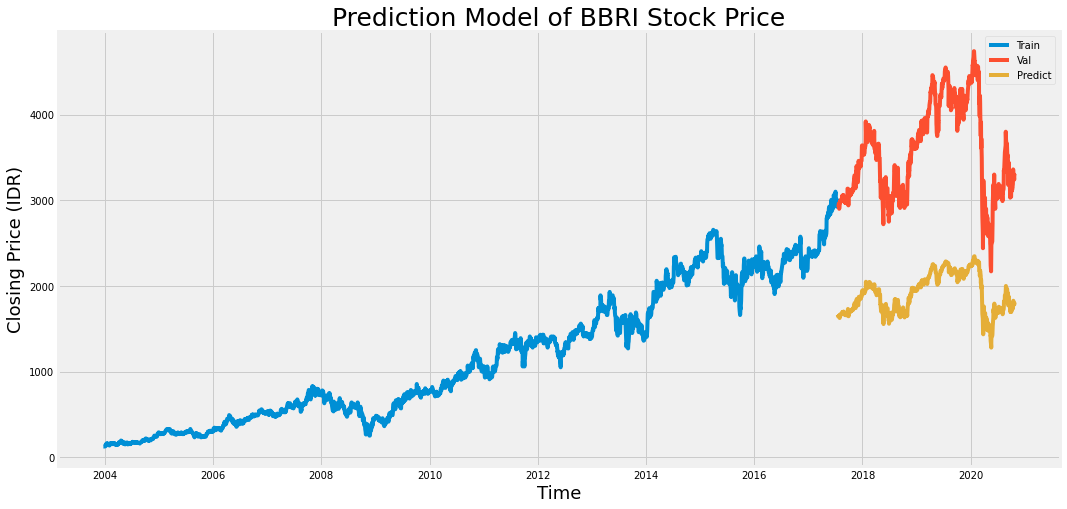

In [91]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model of BBRI Stock Price', fontsize=25)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.plot(datatrain_bbri['Close'])
plt.plot(datavalid_bbri[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [92]:
bbri_quote = web.DataReader('BBRI.jk', data_source='yahoo',
                            start='2020-01-01',
                            end='2020-10-25')
new_df_bbri = bbri_quote.filter(['Close'])
bbri_last_60_days = new_df_bbri[-60:].values
bbri_last_60_days_scaled = scaler.transform(bbri_last_60_days)
bbri_x_test = []
bbri_x_test.append(bbri_last_60_days_scaled)
bbri_x_test = np.array(bbri_x_test)
bbri_x_test = np.reshape(bbri_x_test,
                    (bbri_x_test.shape[0],
                   bbri_x_test.shape[1], 1))
pred_price_bbri = model_bbri.predict(bbri_x_test)
pred_price_bbri = scaler.inverse_transform(pred_price_bbri)
print(pred_price_bbri)

[[2758.5525]]


## **BBNI**

In [93]:
#creating dataframe
datatrain_bbni = bbni_close[:train_bbni_close_len]
datavalid_bbni = bbni_close[train_bbni_close_len:]
datavalid_bbni['Predictions'] = prediction_bbni

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


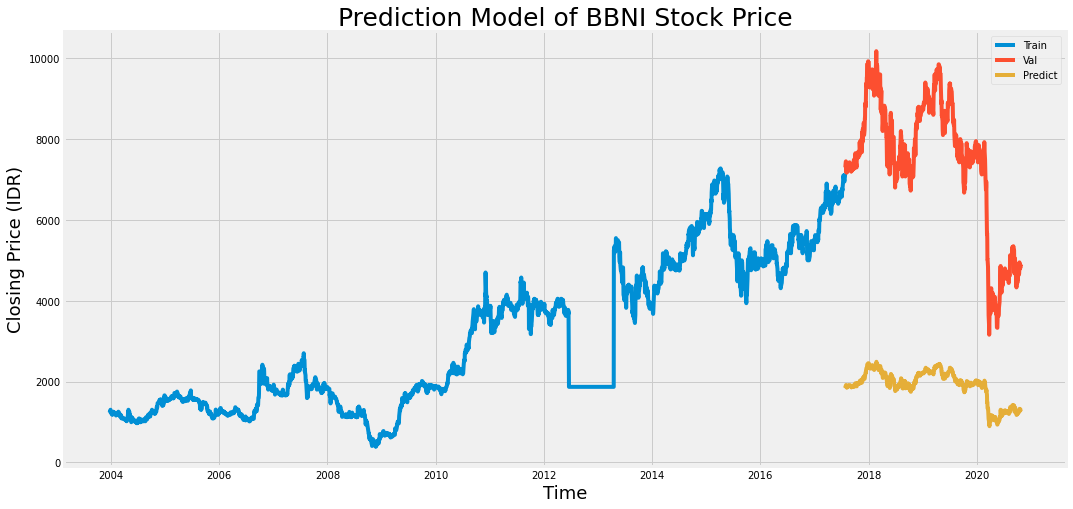

In [94]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model of BBNI Stock Price', fontsize=25)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.plot(datatrain_bbni['Close'])
plt.plot(datavalid_bbni[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [95]:
bbni_quote = web.DataReader('BBNI.jk', data_source='yahoo',
                            start='2020-01-01',
                            end='2020-10-25')
new_df_bbni = bbni_quote.filter(['Close'])
bbni_last_60_days = new_df_bbni[-60:].values
bbni_last_60_days_scaled = scaler.transform(bbni_last_60_days)
bbni_x_test = []
bbni_x_test.append(bbni_last_60_days_scaled)
bbni_x_test = np.array(bbni_x_test)
bbni_x_test = np.reshape(bbni_x_test,
                    (bbni_x_test.shape[0],
                   bbni_x_test.shape[1], 1))
pred_price_bbni = model_bbni.predict(bbni_x_test)
pred_price_bbni = scaler.inverse_transform(pred_price_bbni)
print(pred_price_bbni)

[[3408.3467]]


## **BMRI**

In [96]:
#creating dataframe
datatrain_bmri = bmri_close[:train_bmri_close_len]
datavalid_bmri = bmri_close[train_bmri_close_len:]
datavalid_bmri['Predictions'] = prediction_bmri

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


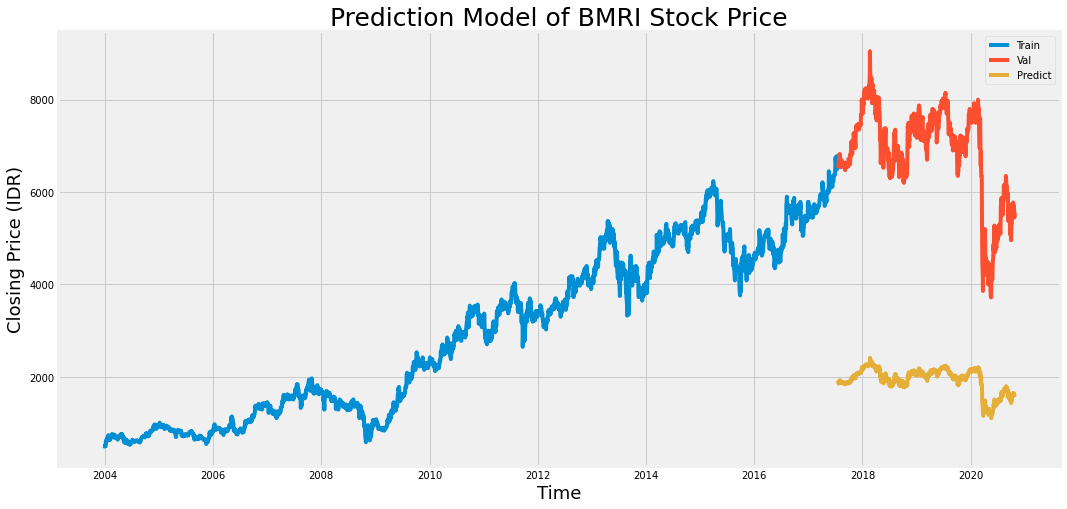

In [97]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model of BMRI Stock Price', fontsize=25)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.plot(datatrain_bmri['Close'])
plt.plot(datavalid_bmri[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [98]:
bmri_quote = web.DataReader('BMRI.jk', data_source='yahoo',
                            start='2020-01-01',
                            end='2020-10-25')
new_df_bmri = bmri_quote.filter(['Close'])
bmri_last_60_days = new_df_bmri[-60:].values
bmri_last_60_days_scaled = scaler.transform(bmri_last_60_days)
bmri_x_test = []
bmri_x_test.append(bmri_last_60_days_scaled)
bmri_x_test = np.array(bmri_x_test)
bmri_x_test = np.reshape(bmri_x_test,
                    (bmri_x_test.shape[0],
                   bmri_x_test.shape[1], 1))
pred_price_bmri = model_bmri.predict(bmri_x_test)
pred_price_bmri = scaler.inverse_transform(pred_price_bmri)
print(pred_price_bmri)

[[3319.974]]


## **BBCA**

In [99]:
#creating dataframe
datatrain_bbca = bbca_close[:train_bbca_close_len]
datavalid_bbca = bbca_close[train_bbca_close_len:]
datavalid_bbca['Predictions'] = prediction_bbca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


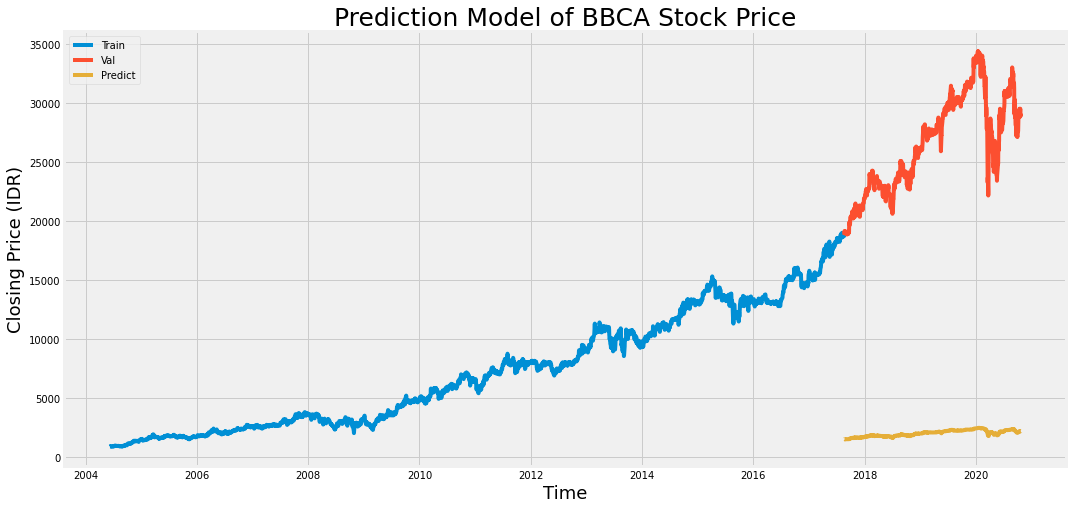

In [100]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model of BBCA Stock Price', fontsize=25)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.plot(datatrain_bbca['Close'])
plt.plot(datavalid_bbca[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [101]:
bbca_quote = web.DataReader('BBCA.jk', data_source='yahoo',
                            start='2020-01-01',
                            end='2020-10-25')
new_df_bbca = bbca_quote.filter(['Close'])
bbca_last_60_days = new_df_bbca[-60:].values
bbca_last_60_days_scaled = scaler.transform(bbca_last_60_days)
bbca_x_test = []
bbca_x_test.append(bbca_last_60_days_scaled)
bbca_x_test = np.array(bbca_x_test)
bbca_x_test = np.reshape(bbca_x_test,
                    (bbca_x_test.shape[0],
                   bbca_x_test.shape[1], 1))
pred_price_bbca = model_bbca.predict(bbca_x_test)
pred_price_bbca = scaler.inverse_transform(pred_price_bbca)
print(pred_price_bbca)

[[3241.474]]


## **BNGA**

In [102]:
#creating dataframe
datatrain_bnga = bnga_close[:train_bnga_close_len]
datavalid_bnga = bnga_close[train_bnga_close_len:]
datavalid_bnga['Predictions'] = prediction_bnga

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


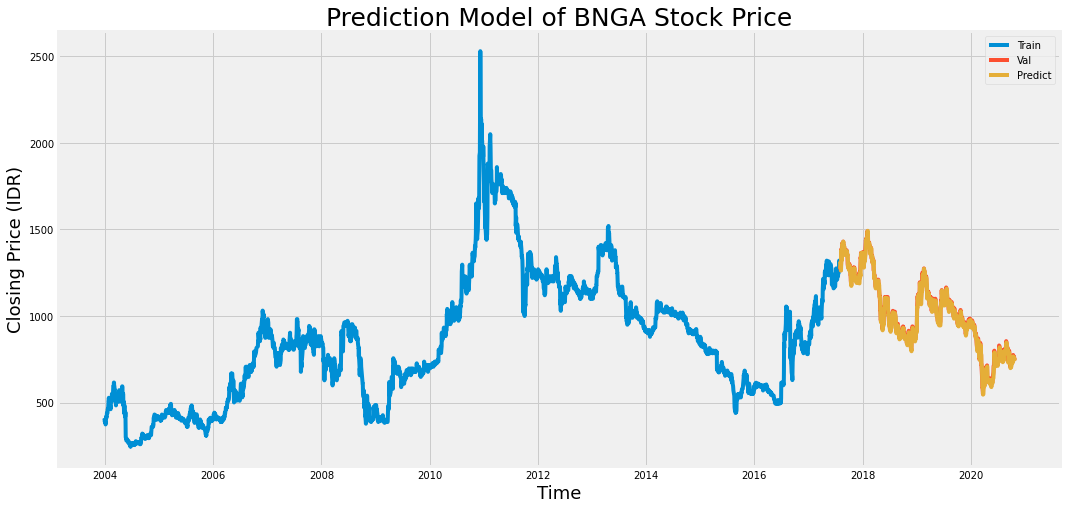

In [103]:
plt.figure(figsize=(16,8))
plt.title('Prediction Model of BNGA Stock Price', fontsize=25)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price (IDR)', fontsize=18)
plt.plot(datatrain_bnga['Close'])
plt.plot(datavalid_bnga[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='lower_right')
plt.show()

In [104]:
bnga_quote = web.DataReader('BNGA.jk', data_source='yahoo',
                            start='2020-01-01',
                            end='2020-10-25')
new_df_bnga = bnga_quote.filter(['Close'])
bnga_last_60_days = new_df_bnga[-60:].values
bnga_last_60_days_scaled = scaler.transform(bnga_last_60_days)
bnga_x_test = []
bnga_x_test.append(bnga_last_60_days_scaled)
bnga_x_test = np.array(bnga_x_test)
bnga_x_test = np.reshape(bnga_x_test,
                    (bnga_x_test.shape[0],
                   bnga_x_test.shape[1], 1))
pred_price_bnga = model_bnga.predict(bnga_x_test)
pred_price_bnga = scaler.inverse_transform(pred_price_bnga)
print(pred_price_bnga)

[[746.50446]]


# **How much value do we put at risk by investing in a particular stock?**

In [106]:
from pandas_datareader.data import DataReader

banks_list = ['BBRI.jk', 'BBNI.jk', 'BMRI.jk', 'BBCA.jk', 'BNGA.jk']

start = '2003-12-23'
end = '2020-10-23'

bank_close = DataReader(banks_list, 'yahoo', start, end)['Close']
bank_close

Symbols,BBRI.jk,BBNI.jk,BMRI.jk,BBCA.jk,BNGA.jk
Date,,,,,
2003-12-23,125.0,1232.400024,503.942993,NaN,395.984985
2003-12-29,125.0,1303.500000,503.942993,NaN,400.385010
2003-12-30,125.0,1232.400024,491.652008,NaN,395.984985
2004-01-02,127.5,1232.400024,491.652008,NaN,387.186005
2004-01-05,127.5,1232.400024,516.234009,NaN,387.186005
...,...,...,...,...,...
2020-10-19,3280.0,4890.000000,5700.000000,29500.0,765.000000
2020-10-20,3250.0,4810.000000,5650.000000,29025.0,760.000000
2020-10-21,3240.0,4880.000000,5525.000000,28900.0,755.000000


In [107]:
# Make a new bank returns DataFrame
bank_rets = bank_close.pct_change()
bank_rets

Symbols,BBRI.jk,BBNI.jk,BMRI.jk,BBCA.jk,BNGA.jk
Date,,,,,
2003-12-23,NaN,NaN,NaN,NaN,NaN
2003-12-29,0.000000,0.057692,0.000000,NaN,0.011112
2003-12-30,0.000000,-0.054545,-0.024390,NaN,-0.010989
2004-01-02,0.020000,0.000000,0.000000,NaN,-0.022220
2004-01-05,0.000000,0.000000,0.049999,NaN,0.000000
...,...,...,...,...,...
2020-10-19,0.009231,0.016632,0.022422,0.024306,0.013245
2020-10-20,-0.009146,-0.016360,-0.008772,-0.016102,-0.006536
2020-10-21,-0.003077,0.014553,-0.022124,-0.004307,-0.006579


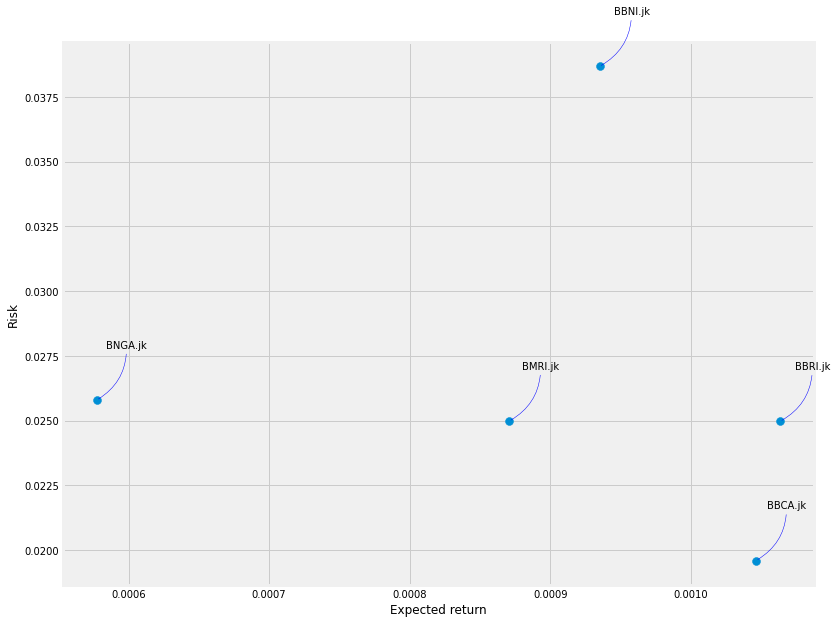

In [108]:
rets = bank_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))